# Resources
- [Kaggel](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering)
- [Kaggel](https://www.kaggle.com/code/listonlt/mall-customers-segmentation-k-means-clustering)
- [Medium](https://medium.com/analytics-vidhya/clustering-analysis-of-mall-customer-bd785577f1b0)

In [8]:
# This is mall customer segmentation using KMeans clustering algorithm
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [2]:
# Importing the dataset
df = pd.read_csv('../data/mall_customers.csv')

# Exploratory Data Analysis
print("The head of the data: ")
df.head()

# Checking the data types
print("\nThe tail of the data: ")
df.info()

# Descriptive statistics
print("\nThe description of the data: ")
df.describe()

# Checking for missing values
print("\nThe missing values of the data: ")
df.isnull().sum()

# Shape of the data
print("The shape of the data: ", df.shape)

The head of the data: 

The tail of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

The description of the data: 

The missing values of the data: 
The shape of the data:  (200, 5)


/tmp/ipykernel_13842/1429170058.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")


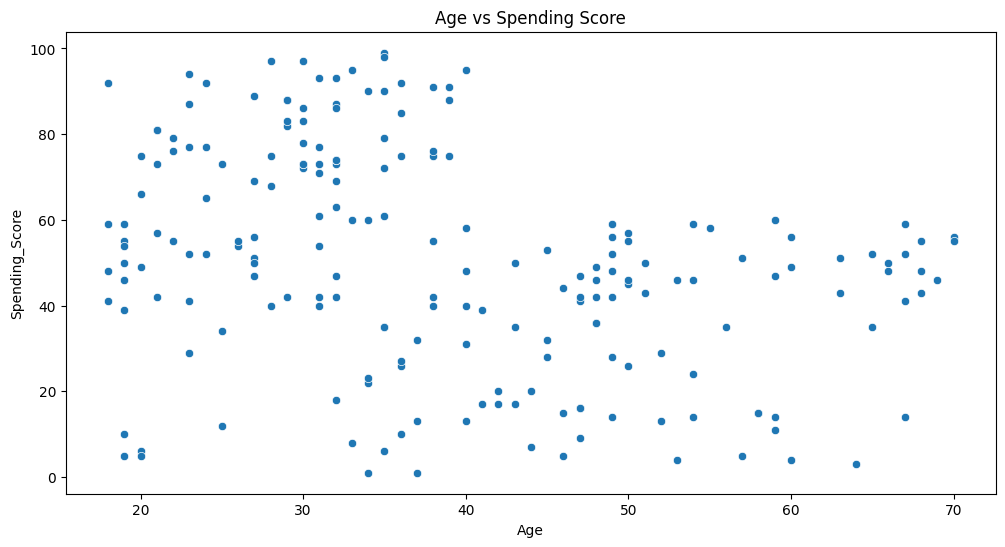

In [9]:
# plot age vs spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")
plt.title("Age vs Spending Score")
plt.show()

/tmp/ipykernel_13842/438485003.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")


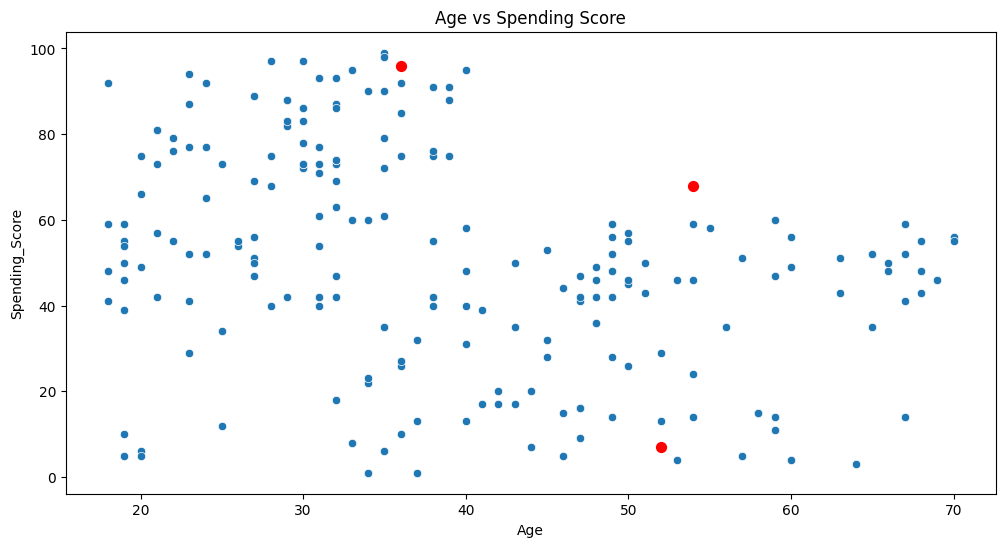

The centroid values:  [(36, 96), (52, 7), (54, 68)]


In [18]:
# create centroids
nC = 3
centroids = list(
    sorted(
        zip(
            random.sample(range(min(df['Age']), max(df['Age']+1)), nC),
            random.sample(range(min(df['Spending_Score']), max(df['Spending_Score']+1)), nC)
        )
    )
)

# plot age vs spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")
plt.title("Age vs Spending Score")
plt.scatter(*zip(*centroids), color='red', s=50)
plt.show()

# Centroid values
print("The centroid values: ", centroids)

In [21]:
# calculate the distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


# calculate the distance between two points
df['D1'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[0][0], centroids[0][1])
df['D2'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[1][0], centroids[1][1])
df['D3'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[2][0], centroids[2][1])

print("The head of the data: ")
df.head()

The head of the data: 


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,D1,D2,D3
0,1,Male,19,15,39,59.481089,45.967380,45.453273
1,2,Male,21,15,81,21.213203,80.230917,35.468296
2,3,Female,20,16,6,91.411159,32.015621,70.710678
3,4,Female,23,16,77,23.021729,75.769387,32.280025
4,5,Female,31,17,40,56.222771,39.115214,36.235342


In [28]:
# find the minimum distance
df['Cluster'] = df[['D1', 'D2', 'D3']].idxmin(axis=1) # find the minimum distance
df['Cluster'] = df['Cluster'].apply(lambda x: int(x[1])) # get the cluster number
print("The head of the data: ")
df.head()

The head of the data: 


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,D1,D2,D3,Cluster
0,1,Male,19,15,39,59.481089,45.967380,45.453273,3
1,2,Male,21,15,81,21.213203,80.230917,35.468296,1
2,3,Female,20,16,6,91.411159,32.015621,70.710678,2
3,4,Female,23,16,77,23.021729,75.769387,32.280025,1
4,5,Female,31,17,40,56.222771,39.115214,36.235342,3
